In [31]:

import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from numpy import linalg as LA
from sklearn.metrics import mean_squared_error
from keras.layers import Activation, Dense, LSTM,Dropout
import tensorflow as tf
dataframe = pandas.read_csv("fullinverse.csv", header=None)
#dataset = dataframe.values
train, test = train_test_split(dataframe, test_size=0)
X_train = train.loc[:,0:11]
Y_train = train.loc[:,12:18]
dataframe = pandas.read_csv("fullinverse2.csv", header=None)
dataset = dataframe.values
X_test = dataset[:,0:12]
Y_test = dataset[:,12:19]
#X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
#Y_train = Y_train.values.reshape(Y_train.shape[0], 1, Y_train.shape[1])
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
Y_train = Y_train.values.reshape(Y_train.shape[0], 1, Y_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
Y_test = Y_test.reshape(Y_test.shape[0], 1, Y_test.shape[1])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

leng=X_train.shape[2]
print(leng)

(1871, 1, 12)
(1871, 1, 7)
(803, 1, 12)
12


In [32]:
m = np.mean(X_train)
X_train = (X_train-m)/(np.max(X_train)-np.min(X_train))

m = np.mean(Y_train)
Y_train = (Y_train-m)/(np.max(Y_train)-np.min(Y_train))

m = np.mean(X_test)
X_test = (X_test-m)/(np.max(X_test)-np.min(X_test))

m = np.mean(Y_test)
Y_test = (Y_test-m)/(np.max(Y_test)-np.min(Y_test))


print (X_train.shape)
print (Y_train.shape)

'''epochs = 10

model = Sequential()
model.add(LSTM(input_dim=12, output_dim=4,  return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(64,return_sequences=True))
#model.add(Dropout(0.2))

#model.add(LSTM(64,return_sequences=True))
#model.add(Dropout(0.2))

#model.add(LSTM(4,return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(4,return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(output_dim=7))
model.add(Activation("sigmoid"))
opt= tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss="mse", optimizer="adam", metrics = ['accuracy'])
model.summary()

model.fit(X_train, Y_train, batch_size=100, epochs=epochs, verbose=1)
y_pred = model.predict(X_test)
print(LA.norm(Y_test - y_pred))
print(LA.norm(Y_test - y_pred)**2/Y_test.size)
#print(mean_squared_error(Y_test, y_pred))'''



(1871, 1, 12)
(1871, 1, 7)


'epochs = 10\n\nmodel = Sequential()\nmodel.add(LSTM(input_dim=12, output_dim=4,  return_sequences=True))\nmodel.add(Dropout(0.2))\n\n#model.add(LSTM(64,return_sequences=True))\n#model.add(Dropout(0.2))\n\n#model.add(LSTM(64,return_sequences=True))\n#model.add(Dropout(0.2))\n\n#model.add(LSTM(4,return_sequences=True))\n#model.add(Dropout(0.2))\n\nmodel.add(LSTM(4,return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(output_dim=7))\nmodel.add(Activation("sigmoid"))\nopt= tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)\nmodel.compile(loss="mse", optimizer="adam", metrics = [\'accuracy\'])\nmodel.summary()\n\nmodel.fit(X_train, Y_train, batch_size=100, epochs=epochs, verbose=1)\ny_pred = model.predict(X_test)\nprint(LA.norm(Y_test - y_pred))\nprint(LA.norm(Y_test - y_pred)**2/Y_test.size)\n#print(mean_squared_error(Y_test, y_pred))'

In [33]:
model = Sequential()
model.add(LSTM(leng, input_shape=(1, leng), return_sequences=True, activation='tanh'))
#model.add(LSTM(leng, input_shape=(1, leng), return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(leng, input_shape=(1, leng), return_sequences=True, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(LSTM(leng, input_shape=(1, leng), return_sequences=True, activation='sigmoid'))
model.add(LSTM(leng, input_shape=(1, leng), return_sequences=True, activation='sigmoid'))
model.add(Dense(output_dim=7))
model.compile(loss='mse', optimizer='adam', metrics= ['accuracy', 'mse', 'mae', 'mape', 'cosine'])
#model.summary()
history=model.fit( X_test, Y_test, nb_epoch=1000, batch_size=30, validation_data=(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=7)`
C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 803 samples, validate on 803 samples
Epoch 1/1000
803/803 [==============================] - 5s 6ms/step - loss: 0.1166 - acc: 0.2316 - mean_squared_error: 0.1166 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 975.3407 - cosine_proximity: 0.0011 - val_loss: 0.0818 - val_acc: 0.2316 - val_mean_squared_error: 0.0818 - val_mean_absolute_error: 0.2472 - val_mean_absolute_percentage_error: 832.7101 - val_cosine_proximity: -0.2601
Epoch 2/1000
803/803 [==============================] - 0s 215us/step - loss: 0.0612 - acc: 0.2316 - mea

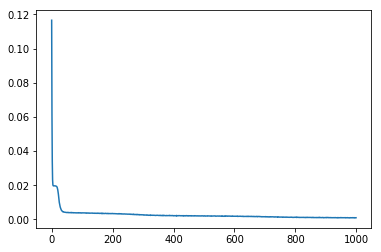

In [34]:
plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['mean_absolute_percentage_error'])
#plt.plot(history.history['cosine_proximity'])
plt.show()

In [35]:
predict = model.predict(X_train)
print(predict)

[[[ 0.0640334  -0.2530482  -0.43588692 ...  0.15790254  0.26435775
   -0.12148399]]

 [[ 0.12100299 -0.30260324 -0.456372   ...  0.0916255   0.23685232
   -0.10550473]]

 [[ 0.11961873 -0.30166793 -0.45582512 ...  0.09391133  0.24196233
   -0.10462163]]

 ...

 [[ 0.12031356 -0.3021323  -0.45610127 ...  0.0927435   0.2392917
   -0.10509934]]

 [[ 0.05732347 -0.24701673 -0.43343243 ...  0.16569136  0.26639506
   -0.12371809]]

 [[ 0.12008932 -0.30199036 -0.4560633  ...  0.09297131  0.23923223
   -0.10512801]]]


In [36]:
S_0 = predict[:,:,1:2]
S_1 = predict[:,:,2:3]
E_0 = predict[:,:,3:4]
E_1 = predict[:,:,4:5]
W_0 = predict[:,:,5:6]
W_1 = predict[:,:,6:7]
W_2 = predict[:,:,7:8]
print(S_0.shape)

(1871, 1, 1)


In [37]:
print(LA.norm(Y_train - predict))
print(LA.norm(Y_train - predict)**2/Y_train.size)

33.29172119401869
0.08462538749792116


In [40]:
import math
#kinematic parameters of baxter
#a,b,c,d,e,f,g are the angles
a_1 = 69; a_2 = 0; a_3 = 69; a_4 = 0; a_5 = 10; a_6 = 0; a_7 = 0
d_1 = 270; d_2 = 0; d_3 = 364; d_4 = 0; d_5 = 375; d_7 = 220.525

X=[]
Y=[]
Z=[]
for i in range(0, 1870):
    a=predict[i][0][0]   ;b= predict[i][0][1] ;c= predict[i][0][2] ;d= predict[i][0][3] ;e= predict[i][0][4] ;f= predict[i][0][5] ;g= predict[i][0][6] 
    
    R_1 = np.array([[math.cos(a), 0, -math.sin(a), a_1*math.cos(a)], [math.sin(a), 0, math.cos(a), a_1*math.sin(a)], [0, -1, 0, d_1], [0, 0, 0, 1]])
    R_2 = np.array([[math.cos(b), 0, math.sin(b), 0], [math.sin(b), 0, -math.cos(b), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_3 = np.array([[math.cos(c), 0, -math.sin(c), a_3*math.cos(c)], [math.sin(c), 0, math.cos(c), a_3*math.sin(c)], [0, -1, 0, d_3], [0, 0, 0, 1]])
    R_4 = np.array([[math.cos(d), 0, math.sin(d), 0], [math.sin(d), 0, -math.cos(d), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_5 = np.array([[math.cos(e), 0, -math.sin(e), a_5*math.cos(e)], [math.sin(e), 0, math.cos(e), a_5*math.sin(e)], [0, -1, 0, d_5], [0, 0, 0, 1]])
    R_6 = np.array([[math.cos(f), 0, math.sin(f), 0], [math.sin(f), 0, -math.cos(f), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_7 = np.array([[math.cos(g), -math.sin(g), 0, 0], [math.sin(g), math.cos(g), 0, 0], [0, 1, 0, d_7], [0, 0, 0, 1]])

    C_M = R_1.dot(R_2).dot(R_3).dot(R_4).dot(R_5).dot(R_6).dot(R_7)
    print(C_M[1][1])
    X.append(C_M[0][3])
    Y.append(C_M[1][3])
    Z.append(C_M[2][3])

0.7671715874531824
0.7290477388730169
0.7305284814011855
0.8526160066259147
0.8480361208517269
0.8347795220167702
0.7294711937683437
0.7688139155505513
0.7722694176959739
0.7294969229299059
0.7298547782429924
0.7716344688772493
0.7721904614102268
0.8323384687550042
0.8479971171633567
0.7989529580270625
0.7677487424744378
0.72885726002085
0.7671611590872862
0.7673830561107516
0.7298978034034791
0.852654207912233
0.8525595235648524
0.7997601828974011
0.7292596575959656
0.7680534751648557
0.7703523645178767
0.852613342535198
0.7290676192179962
0.7716943166064891
0.8438786350441622
0.7663499086610313
0.8525819365498131
0.8526390949460494
0.8235835157253034
0.8514970061140185
0.7677879143604408
0.7704323346874927
0.7674708754910529
0.8082733648532798
0.7551904638928995
0.7677119746360838
0.8527697734846301
0.7296710032022129
0.8775181693381517
0.7675756154615527
0.7684476463193728
0.7290514107749404
0.7680258827917352
0.7684877314810084
0.8526117795280499
0.7988298125407203
0.76658256052094

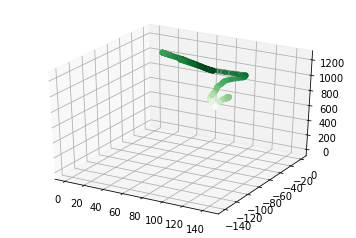

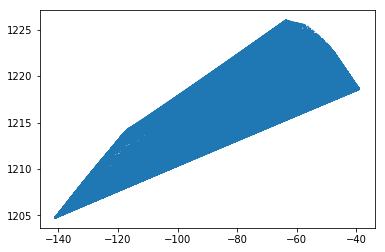

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 500, 1)
xline = np.linspace(0, 500, 1)
yline = np.linspace(0, 500, 1)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = Z
xdata = X
ydata = Y
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.show()

plt.plot(Y, Z)
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

trainPredict = model.predict(X_train)

ax = 0
mse = numpy.square(Y_train - trainPredict).mean()
mse = ((Y_train, trainPredict) ** 2).mean(axis=ax)
#mse = mean_squared_error(Y_train, trainPredict)
print (mse)
    
    
#print (trainPredict, " >->> " , y_train)